In [68]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [69]:
gem5_dir = "./gem5-results"
#gem5_dir = "./gem5-matmul-results"
gem5_runs = [os.path.join(gem5_dir, x) for x in os.listdir(gem5_dir)]
champsim_dir = "./champsim-results"
#champsim_dir = "./champsim-matmul-results"
champsim_runs = [os.path.join(champsim_dir, x) for x in os.listdir(champsim_dir)]

In [70]:
gem5_data_raw = {'assoc': [],
             'lat': [],
             'ipc': []
             }
for g5r in gem5_runs:
    with open(os.path.join(g5r, "stats.txt")) as f:
        for line in f:
            if "board.processor.cores.core.ipc" in line:
                cache_conf = os.path.basename(g5r).split("-")[1:]
                assoc = cache_conf[1] 
                lat = cache_conf[2] 
                gem5_data_raw["assoc"].append(int(assoc))
                gem5_data_raw["lat"].append(int(lat))
                gem5_data_raw["ipc"].append(float(line.split()[1]))

gem5_data = pd.DataFrame(gem5_data_raw)
gem5_data.groupby(gem5_data["lat"])
gem5_data[gem5_data['lat'] == 4].sort_values('assoc').head()

,assoc,lat,ipc
7,2,4,0.722732
1,4,4,0.722732
8,8,4,0.725318
12,16,4,0.724001
6,32,4,0.722650


In [71]:
champsim_data_raw = {'assoc': [],
             'lat': [],
             'ipc': []
             }
for g5r in champsim_runs:
    ready_to_read = False
    print(g5r)
    with open(os.path.join(g5r)) as f:
        for line in f:
            if "Region of Interest Statistics" == line.strip():
                ready_to_read = True
                continue
            if not ready_to_read:
                continue
            if "cumulative IPC" in line and "Heartbeat" not in line and ready_to_read:
                cache_conf = os.path.basename(g5r).split("-")[1:]
                assoc = cache_conf[1] 
                lat = cache_conf[2] 
                champsim_data_raw["assoc"].append(int(assoc))
                champsim_data_raw["lat"].append(int(lat))
                print(line.split()[4])
                champsim_data_raw["ipc"].append(float(line.split()[4]))

champsim_data = pd.DataFrame(champsim_data_raw)
champsim_data.groupby(champsim_data["lat"])
champsim_data[champsim_data['lat'] == 4].sort_values('assoc')

./champsim-matmul-results/champsim-32-8-2
0.972117
./champsim-matmul-results/champsim-32-8-8
0.972117
./champsim-matmul-results/champsim-32-8-4
0.972117
./champsim-matmul-results/champsim-32-32-4
0.972117
./champsim-matmul-results/champsim-32-8-1
0.972117
./champsim-matmul-results/champsim-32-4-4
0.972117
./champsim-matmul-results/champsim-32-8-16
0.972117
./champsim-matmul-results/champsim-32-16-4
0.972117
./champsim-matmul-results/champsim-32-2-4
0.972117
./champsim-matmul-results/champsim-32-4-2
0.972117
./champsim-matmul-results/champsim-32-32-16
0.972117
./champsim-matmul-results/champsim-32-2-1
0.972117
./champsim-matmul-results/champsim-32-16-8
0.972117


,assoc,lat,ipc
8,2,4,0.972117
5,4,4,0.972117
2,8,4,0.972117
7,16,4,0.972117
3,32,4,0.972117


8    0.725318
Name: ipc, dtype: float64
8    0.725318
Name: ipc, dtype: float64
8    0.725318
Name: ipc, dtype: float64
8    0.725318
Name: ipc, dtype: float64
8    0.725318
Name: ipc, dtype: float64


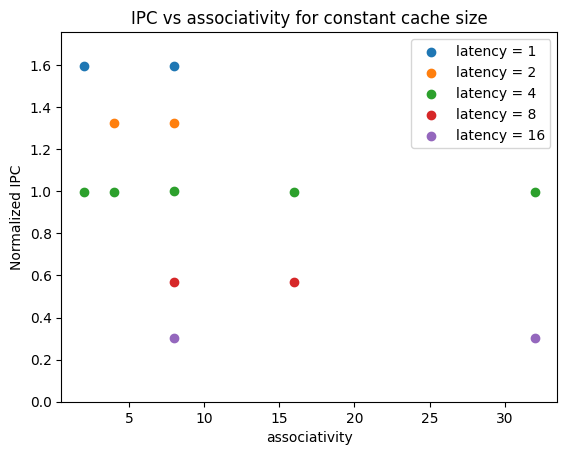

In [72]:
baseline_gem5 = (gem5_data[(gem5_data[['lat', "assoc"]] == [4, 8]).all(1)]['ipc'])
for lat in np.unique(np.array(gem5_data["lat"])):
    graph_data = gem5_data[gem5_data["lat"] == lat].sort_values('assoc')
    print(baseline_gem5)
    plt.scatter(graph_data['assoc'], np.array(graph_data['ipc'])/float(baseline_gem5), label="latency = "+str(lat))
plt.ylim(0, np.max(np.array(gem5_data['ipc'])/float(baseline_gem5)) * 1.1)
plt.xlabel("associativity")
plt.ylabel("Normalized IPC")
plt.title("IPC vs associativity for constant cache size")
plt.legend()


2    0.972117
Name: ipc, dtype: float64
2    0.972117
Name: ipc, dtype: float64
2    0.972117
Name: ipc, dtype: float64
2    0.972117
Name: ipc, dtype: float64
2    0.972117
Name: ipc, dtype: float64


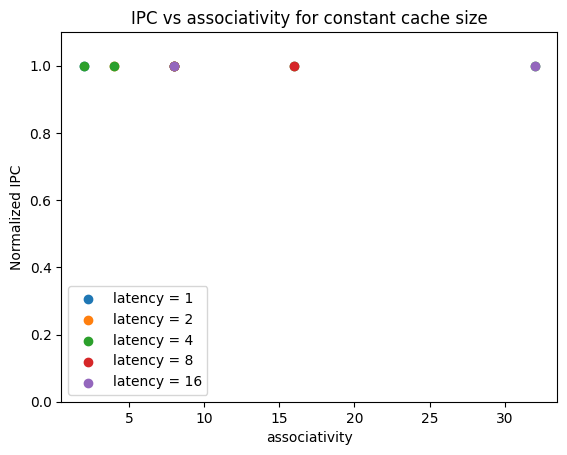

In [73]:
baseline_gem5 = (champsim_data[(champsim_data[['lat', "assoc"]] == [4, 8]).all(1)]['ipc'])
for lat in np.unique(np.array(champsim_data["lat"])):
    graph_data = champsim_data[champsim_data["lat"] == lat].sort_values('assoc')
    print(baseline_gem5)
    plt.scatter(graph_data['assoc'], np.array(graph_data['ipc'])/float(baseline_gem5), label="latency = "+str(lat))
plt.ylim(0, np.max(np.array(champsim_data['ipc'])/float(baseline_gem5)) * 1.1)
plt.xlabel("associativity")
plt.ylabel("Normalized IPC")
plt.title("IPC vs associativity for constant cache size")
plt.legend()

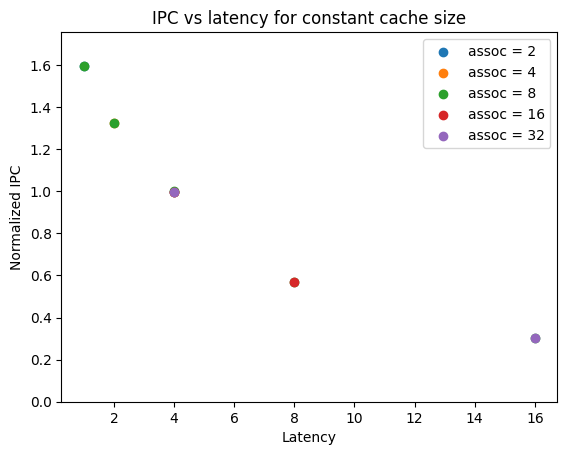

In [74]:
baseline_gem5 = (gem5_data[(gem5_data[['lat', "assoc"]] == [4, 8]).all(1)]['ipc'])
for assoc in np.unique(np.array(gem5_data["assoc"])):
    graph_data = gem5_data[gem5_data["assoc"] == assoc].sort_values('lat')
    plt.scatter(graph_data['lat'], np.array(graph_data['ipc'])/float(baseline_gem5), label="assoc = "+str(assoc))
plt.ylim(0, np.max(np.array(gem5_data['ipc'])/float(baseline_gem5)) * 1.1)
plt.xlabel("Latency")
plt.ylabel("Normalized IPC")
plt.title("IPC vs latency for constant cache size")
plt.legend()

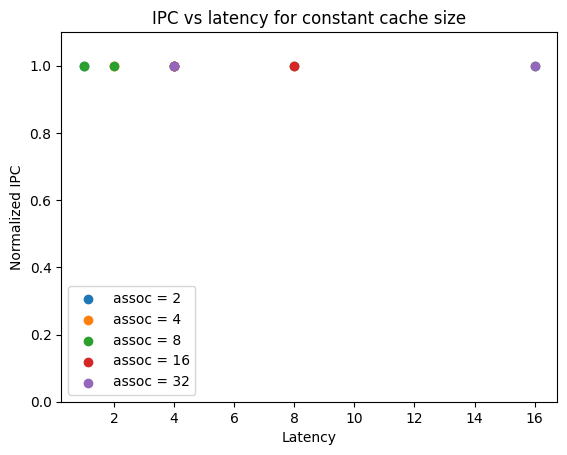

In [75]:
baseline_gem5 = (champsim_data[(champsim_data[['lat', "assoc"]] == [4, 8]).all(1)]['ipc'])
for assoc in np.unique(np.array(champsim_data["assoc"])):
    graph_data = champsim_data[champsim_data["assoc"] == assoc].sort_values('lat')
    plt.scatter(graph_data['lat'], np.array(graph_data['ipc'])/float(baseline_gem5), label="assoc = "+str(assoc))
plt.ylim(0, np.max(np.array(champsim_data['ipc'])/float(baseline_gem5)) * 1.1)
plt.xlabel("Latency")
plt.ylabel("Normalized IPC")
plt.title("IPC vs latency for constant cache size")
plt.legend()

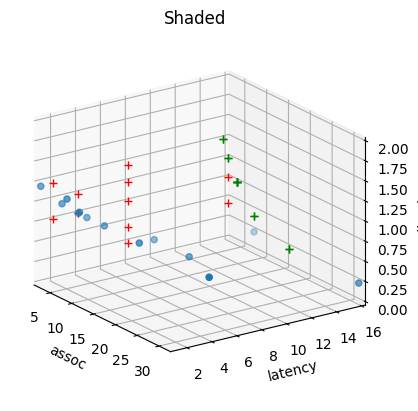

In [76]:

# setup the figure and axes
fig, ax1 = plt.subplots(subplot_kw={"projection": "3d"})

# fake data
x = gem5_data['assoc']
y = gem5_data['lat']
z = gem5_data['ipc']/float(baseline_gem5)

ax1.set_proj_type("ortho")

ax1.plot(x, z, 'r+', zdir='x', zs=x.min())
ax1.plot(y, z, 'g+', zdir='y', zs=y.max())

ax1.scatter(x, y, z)
ax1.set_title('Shaded')

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax1.set_zlim(0, 2)

ax1.set_xlabel("assoc")
ax1.set_ylabel("latency")
ax1.set_zlabel("Normalized IPC")

ax1.view_init(elev=20, azim=-35, roll=0)

plt.show()
plt.close()